In [2]:
import requests
import pandas as pd
import pprint
import matplotlib.pyplot as plt

api_key = "a1cb41a49a32541884d183c47835f12776b1750a"
base_url = "https://api.census.gov/data/2020/dec/pl"

params = {
    'get': 'NAME,P1_001N',  # Unemployed, Employed, Total Population (16+)
    'for': 'state:*',  # Get data for all states
    #'key': api_key     # Your API key
}

In [2]:
# Make the API request

#final_url = f"{base_url}"

response = requests.get(base_url, params=params)

#response = response.json()



# Check if the response was successful
if response.status_code == 200:
    data = response.json()
    pprint.pprint(data)
    df = pd.DataFrame(data[1:], columns=data[0])  # Extract columns and data
    # Convert relevant columns to numeric
    # df['B23025_003E'] = pd.to_numeric(df['B23025_003E'], errors='coerce')  # Unemployed
    # df['B23025_005E'] = pd.to_numeric(df['B23025_005E'], errors='coerce')  # Employed
    # df['B23025_001E'] = pd.to_numeric(df['B23025_001E'], errors='coerce')  # Total Population
    df['P1_001N'] = pd.to_numeric(df['P1_001N'], errors='coerce')

    # Calculate unemployment rate
    #df['Unemployment_Rate'] = (df['B23025_003E'] / df['B23025_001E']) * 100  # Unemployment rate in %
    
    # Show the result
    #print(df[['NAME', 'Unemployment_Rate']])
    #df.head()
else:
    print("Error:", response.status_code)


[['NAME', 'P1_001N', 'state'],
 ['Pennsylvania', '13002700', '42'],
 ['California', '39538223', '06'],
 ['West Virginia', '1793716', '54'],
 ['Utah', '3271616', '49'],
 ['New York', '20201249', '36'],
 ['District of Columbia', '689545', '11'],
 ['Alaska', '733391', '02'],
 ['Florida', '21538187', '12'],
 ['South Carolina', '5118425', '45'],
 ['North Dakota', '779094', '38'],
 ['Maine', '1362359', '23'],
 ['Georgia', '10711908', '13'],
 ['Alabama', '5024279', '01'],
 ['New Hampshire', '1377529', '33'],
 ['Oregon', '4237256', '41'],
 ['Wyoming', '576851', '56'],
 ['Arizona', '7151502', '04'],
 ['Louisiana', '4657757', '22'],
 ['Indiana', '6785528', '18'],
 ['Idaho', '1839106', '16'],
 ['Connecticut', '3605944', '09'],
 ['Hawaii', '1455271', '15'],
 ['Illinois', '12812508', '17'],
 ['Massachusetts', '7029917', '25'],
 ['Texas', '29145505', '48'],
 ['Montana', '1084225', '30'],
 ['Nebraska', '1961504', '31'],
 ['Ohio', '11799448', '39'],
 ['Colorado', '5773714', '08'],
 ['New Jersey', '928

<Axes: xlabel='date'>

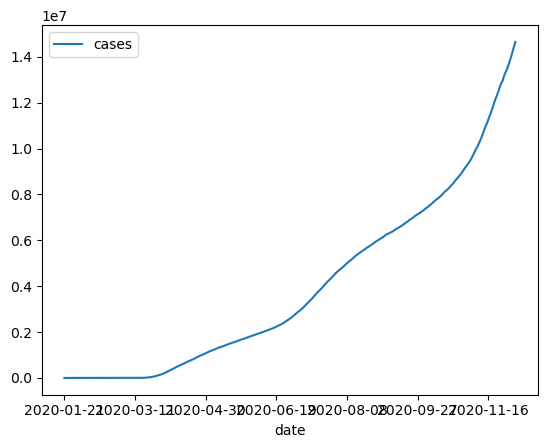

In [3]:
counties_covid = "../Project 1/Data/us_counties_covid19_daily.csv"

counties_covid_df = pd.read_csv(counties_covid)

counties_covid_df = counties_covid_df[["date", "county", "state", "cases", "deaths"]]

counties_covid_df.head()

date_df = counties_covid_df.groupby("date").sum()

date_df

date_df.plot(y = "cases", kind = "line")

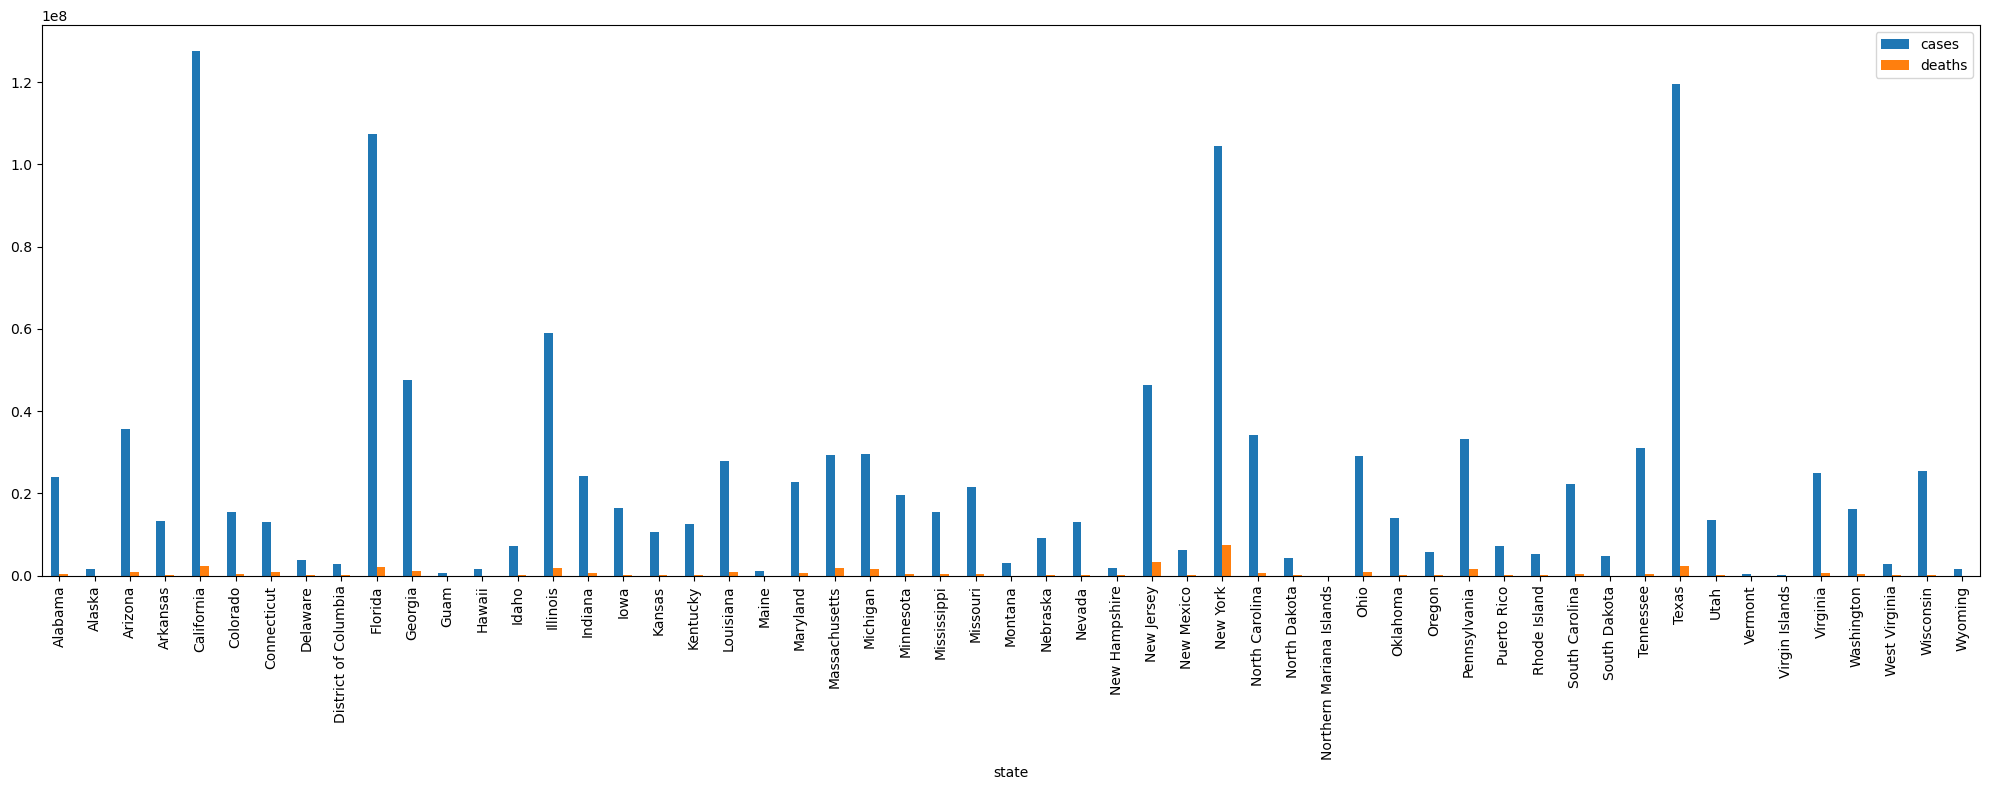

In [4]:
counties_covid_df.head()

c_df = counties_covid_df.groupby("state").sum()

c_df.plot(kind = "bar", figsize = (20, 8))

plt.tight_layout()

plt.show()

Skipping Guam
Skipping Northern Mariana Islands
Skipping Virgin Islands
{'Alabama': 5024279, 'Alaska': 733391, 'Arizona': 7151502, 'Arkansas': 3011524, 'California': 39538223, 'Colorado': 5773714, 'Connecticut': 3605944, 'Delaware': 989948, 'District of Columbia': 689545, 'Florida': 21538187, 'Georgia': 10711908, 'Hawaii': 1455271, 'Idaho': 1839106, 'Illinois': 12812508, 'Indiana': 6785528, 'Iowa': 3190369, 'Kansas': 2937880, 'Kentucky': 4505836, 'Louisiana': 4657757, 'Maine': 1362359, 'Maryland': 6177224, 'Massachusetts': 7029917, 'Michigan': 10077331, 'Minnesota': 5706494, 'Mississippi': 2961279, 'Missouri': 6154913, 'Montana': 1084225, 'Nebraska': 1961504, 'Nevada': 3104614, 'New Hampshire': 1377529, 'New Jersey': 9288994, 'New Mexico': 2117522, 'New York': 20201249, 'North Carolina': 10439388, 'North Dakota': 779094, 'Ohio': 11799448, 'Oklahoma': 3959353, 'Oregon': 4237256, 'Pennsylvania': 13002700, 'Puerto Rico': 3285874, 'Rhode Island': 1097379, 'South Carolina': 5118425, 'South 

<Axes: xlabel='state'>

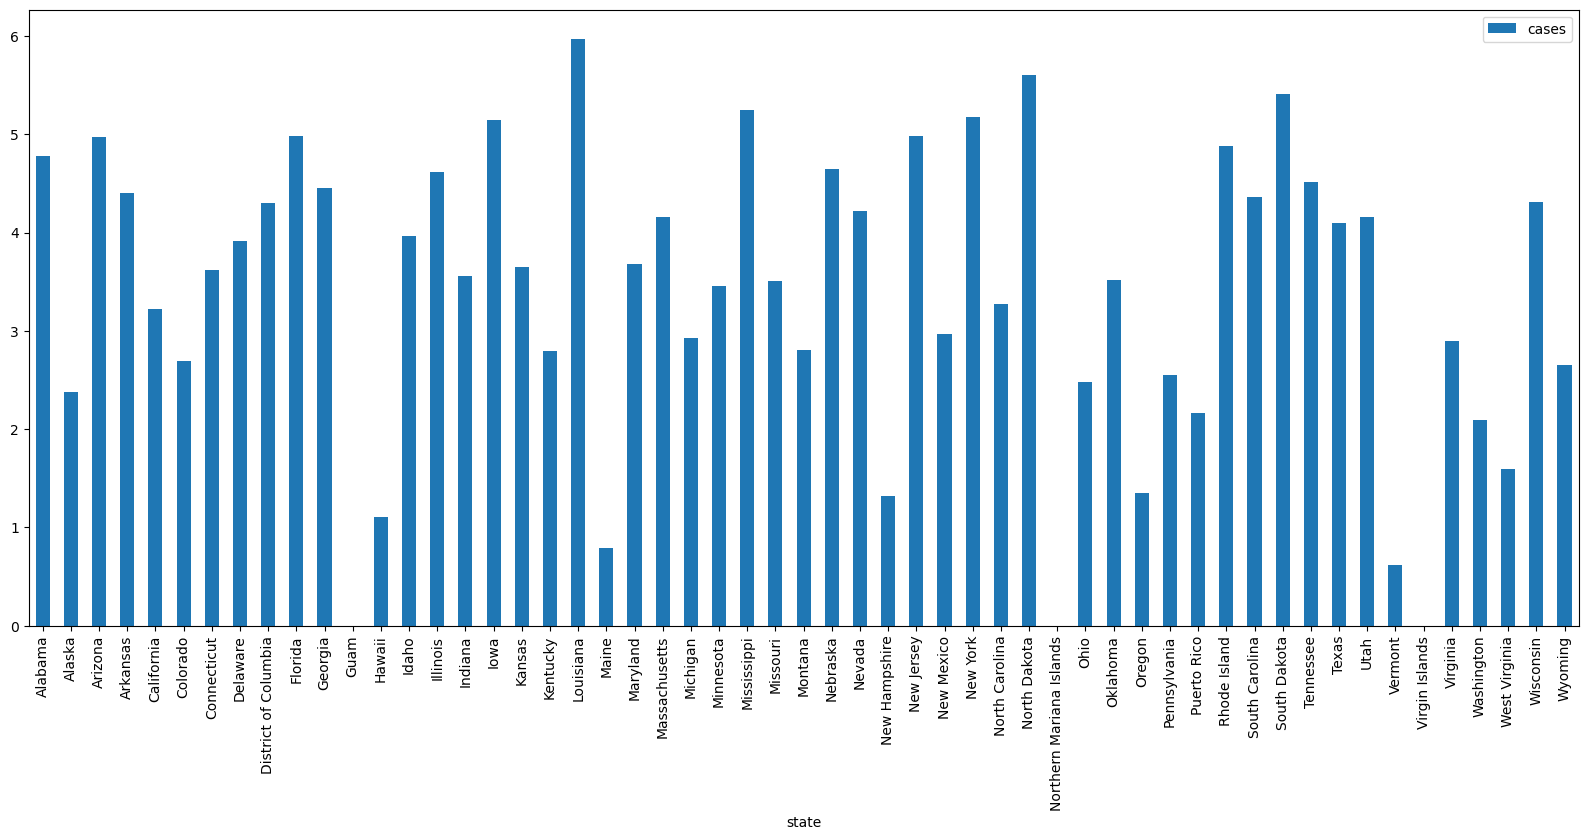

In [5]:
per_10K = c_df

pop_df = df.set_index("NAME")

pop_df.loc["Florida"]["P1_001N"]

#new_df = pd.merge()

total_populations = {}

for index, row in c_df.iterrows():
    try:
        total_populations[index] = pop_df.loc[index]["P1_001N"]
    except:
        print(f"Skipping {index}")
        per_10K.drop(index)

print(total_populations)

p = pd.Series(total_populations)
p.head()

per_10K["Total Pop"] = p
per_10K["cases"] = per_10K["cases"] / per_10K["Total Pop"]
per_10K["deaths"] = per_10K["deaths"] / per_10K["Total Pop"]
#per_10K
#per_10K["cases"] = per_10K["cases"] / total_populations

per_10K.plot(y = "cases", kind= "bar", figsize = (20, 8))

#per_10K.head()



In [78]:
demo_csv = pd.read_csv("../Project 1/Data/demographics.csv")

demo_df = pd.DataFrame(demo_csv)
h = demo_df
h.drop(["population_rural", "population_urban", "population_largest_city", "population_clustered", "population_density", "human_development_index"], axis = 1, inplace = True)
h = h.dropna()
us_main = h.loc[(h["location_key"].str)[:2] == "US"]
us_main = us_main.loc[(h["location_key"].str.len() <= 5)]

states_df = us_main
#us_main

states_df.drop(us_main[us_main["location_key"] == "US"].index, inplace = True)
states_df["location_key"] = states_df["location_key"].str[3:]
states_df.head()

#states_df.plot(xticks = "location_key", y = "population", kind = "bar")

,location_key,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
18284,AK,733391.0,424916.0,391925.0,115198.0,111045.0,128022.0,113254.0,102310.0,116061.0,82608.0,35021.0,13322.0
18314,AL,5024279.0,2512466.0,2681479.0,621981.0,660970.0,701742.0,680141.0,613936.0,666838.0,645125.0,414601.0,188612.0
18382,AR,3011524.0,1585221.0,1654473.0,411655.0,409232.0,438604.0,423461.0,368838.0,394967.0,403526.0,264192.0,125218.0
18459,AZ,7151502.0,4026510.0,4085461.0,1080975.0,1054611.0,1112760.0,1095491.0,905754.0,930631.0,988546.0,646511.0,296692.0
18475,CA,39538223.0,20468055.0,20856543.0,5297960.0,5594857.0,6134141.0,5908592.0,5079947.0,4954811.0,4286163.0,2632208.0,1435918.0


<Axes: xlabel='date'>

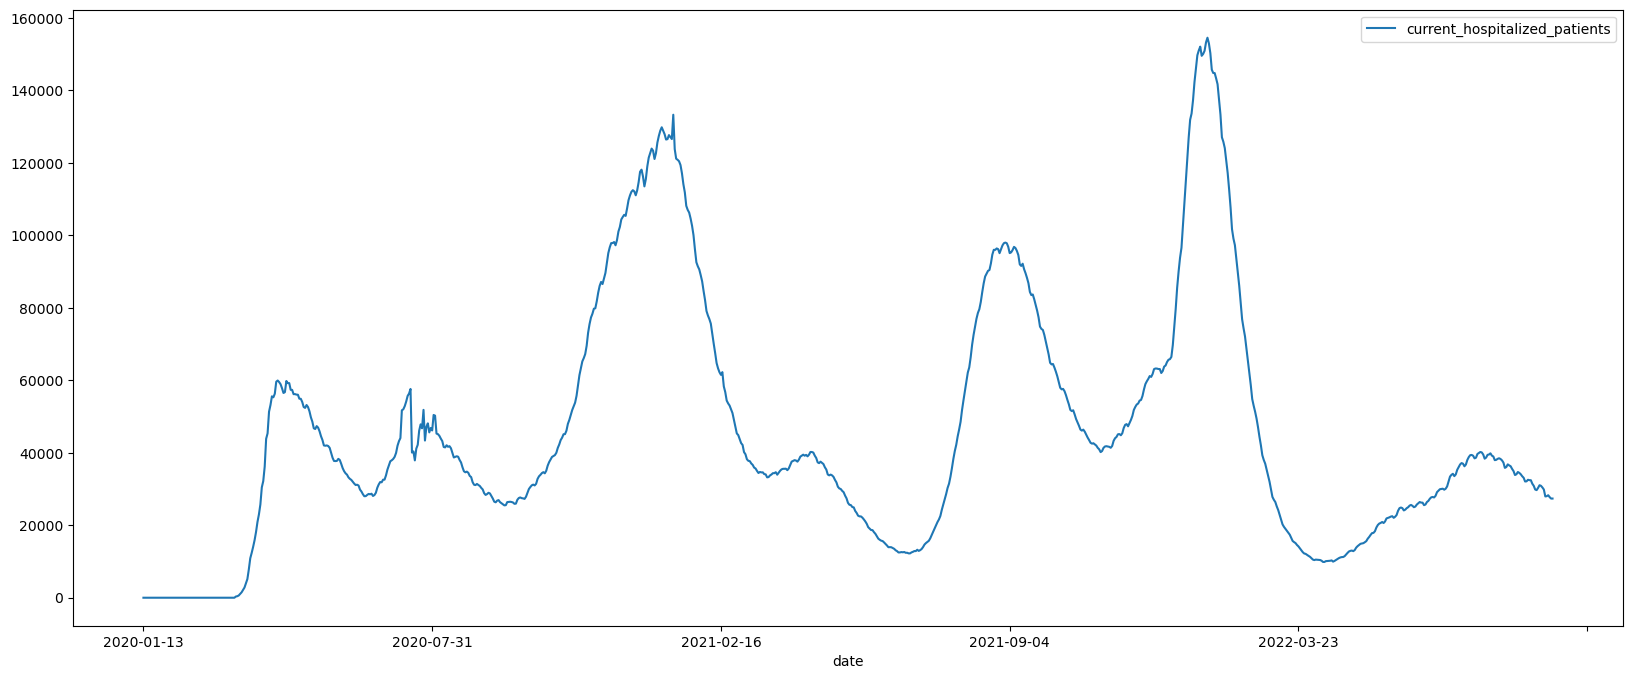

In [119]:
hospital_csv = pd.read_csv("../Project 1/Data/hospitalizations.csv")

hospital_df = pd.DataFrame(hospital_csv)
nHospital_df = hospital_df[["date", "location_key", "cumulative_hospitalized_patients", "current_hospitalized_patients"]]
nHospital_df = nHospital_df.loc[(nHospital_df["location_key"].str)[:2] == "US"]
nHospital_df = nHospital_df.loc[(nHospital_df["location_key"].str.len() <= 2)]

date_df = nHospital_df.groupby("date").max()
date_df.sort_values(by = "current_hospitalized_patients")
date_df.head()
date_df.plot(y = "current_hospitalized_patients", kind = "line", figsize = (20, 8))

<Axes: xlabel='location_key'>

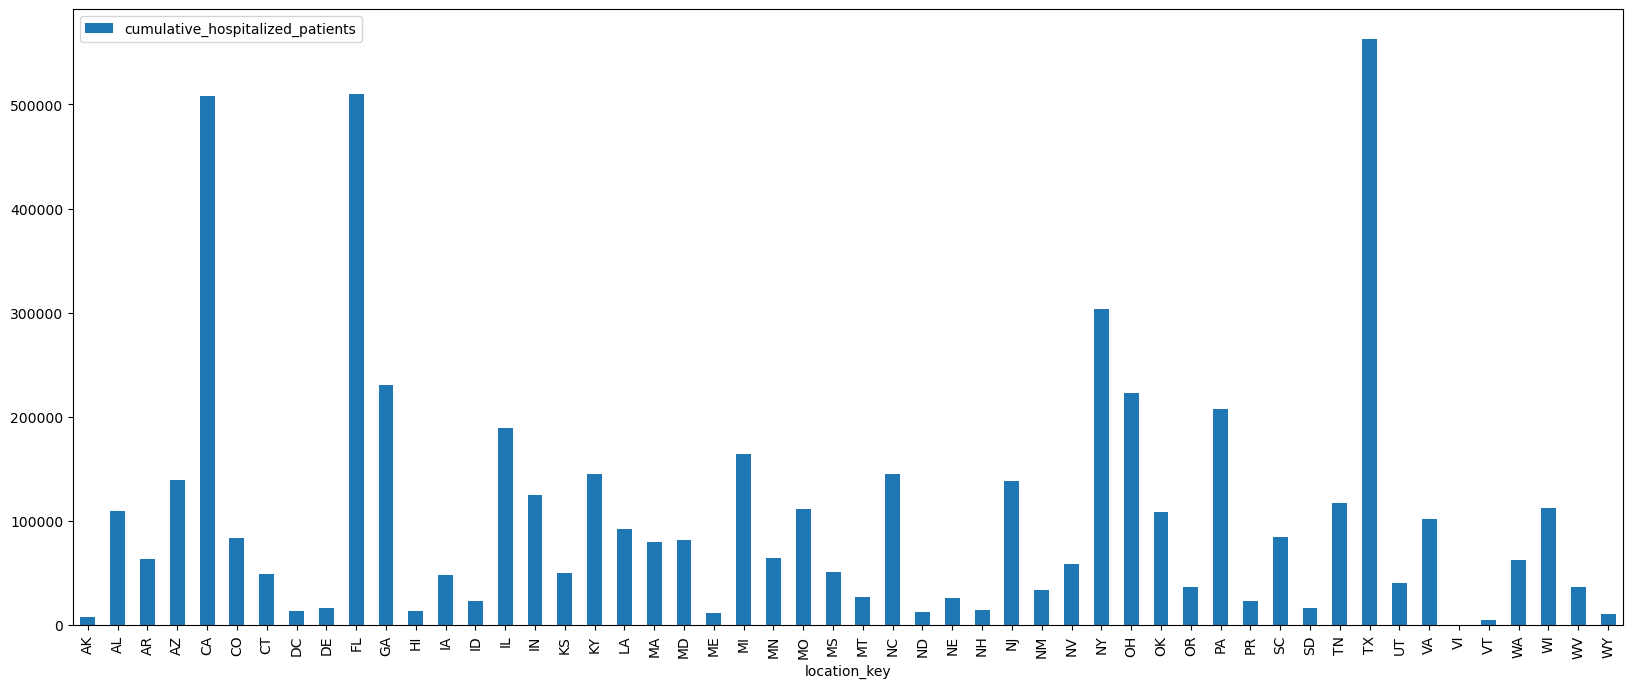

In [121]:
hospital_df = pd.DataFrame(hospital_csv)
to_merge_df = hospital_df[["date", "location_key", "cumulative_hospitalized_patients", "current_hospitalized_patients"]]
to_merge_df = to_merge_df.loc[(to_merge_df["location_key"].str)[:2] == "US"]
to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US"].index, inplace = True)
to_merge_df["location_key"] = to_merge_df["location_key"].str[3:]
to_merge_df = to_merge_df.groupby("location_key").max()

to_merge_df

to_merge2 = states_df.groupby("location_key").max()
to_merge2
new_df = pd.merge(to_merge_df, to_merge2, on = "location_key")
new_df = new_df.dropna()

new_df.plot(y = "cumulative_hospitalized_patients", kind = "bar", figsize = (20, 8))

In [140]:
vaccine_csv = pd.read_csv("../Project 1/Data/vaccinations.csv")
vaccine_df = pd.DataFrame(vaccine_csv)
vaccine_df = vaccine_df[["date", "location_key", "cumulative_persons_vaccinated", "cumulative_vaccine_doses_administered"]]
vaccine_df = vaccine_df.loc[(vaccine_df["location_key"].str)[:2] == "US"]
us_vaccine_df = vaccine_df
us_vaccine_df = us_vaccine_df.loc[(us_vaccine_df["location_key"].str.len() <= 2)]

us_vaccine_df

states_vaccine_df = vaccine_df
states_vaccine_df
states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US"].index, inplace = True)
states_vaccine_df["location_key"] = states_vaccine_df["location_key"].str[3:5]
states_vaccine_df = states_vaccine_df.dropna()
states_vaccine_df

,date,location_key,cumulative_persons_vaccinated,cumulative_vaccine_doses_administered
917598,2021-01-12,AK,22486.0,35838.0
917599,2021-01-13,AK,24541.0,38680.0
917600,2021-01-14,AK,35508.0,42596.0
917601,2021-01-15,AK,39546.0,49039.0
917602,2021-01-19,AK,55434.0,66331.0
...,...,...,...,...
2531122,2022-09-12,WY,343105.0,779002.0
2531123,2022-09-13,WY,343105.0,779002.0
2531124,2022-09-14,WY,343105.0,779002.0
2531125,2022-09-15,WY,343105.0,779002.0


C:\Users\eessd\AppData\Local\Temp\ipykernel_128076\2866302223.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  deaths_csv = pd.read_csv("../Project 1/Data/COVID-19_Deaths_by_Sex_and_Age(USA).csv")


<Axes: ylabel='COVID-19 Deaths'>

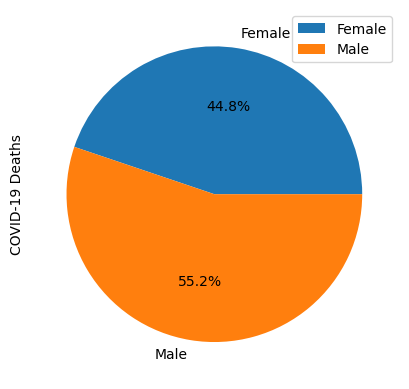

In [183]:
deaths_csv = pd.read_csv("../Project 1/Data/COVID-19_Deaths_by_Sex_and_Age(USA).csv")
deaths_df = pd.DataFrame(deaths_csv)
deaths_df.drop(["Footnote", "Year", "Month", "Pneumonia and COVID-19 Deaths", "Influenza Deaths"], axis = 1, inplace = True)
deaths_df = deaths_df.dropna()
deaths_df["COVID-19 Deaths"] = deaths_df["COVID-19 Deaths"].str.replace(",", "").astype(int)
deaths_df["Total Deaths"] = deaths_df["Total Deaths"].str.replace(",", "").astype(int)
deaths_df["Pneumonia Deaths"] = deaths_df["Pneumonia Deaths"].str.replace(",", "").astype(int)

deaths_df

gDeaths_df = deaths_df.groupby("Sex").max()
gDeaths_df.drop(["All Sexes"], inplace = True)
gDeaths_df
gDeaths_df.plot(y = "COVID-19 Deaths", kind = "pie", autopct="%1.1f%%")